# Introduction

At present, you can choose from three popular open source Deep Learning libraries:

- TensorFlow, 
- Microsoft Cognitive Toolkit (CNTK), 
- Theano. 

Therefore, to avoid any confusion, we will refer to Keras implementation as multi-backend Keras.

TensorFlow itself now comes bundled with its own Keras implementation,tf.keras. It only supports TensorFlow as the backend.

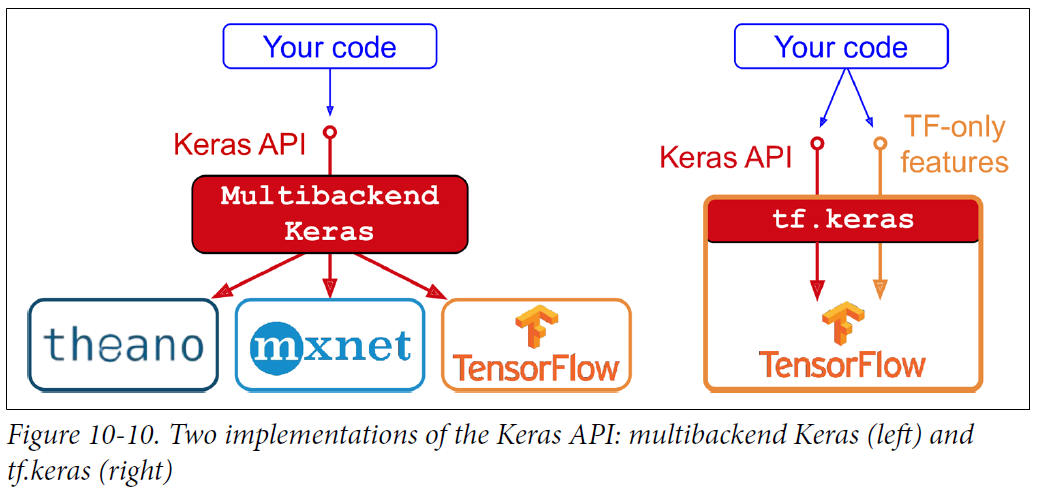

This short introduction uses Tensorflow Keras to:

- Build a neural network that classifies images.
- Train this neural network.
- And, finally, evaluate the accuracy of the model.

# Reference
https://www.tensorflow.org/tutorials/quickstart/beginner

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
import tensorflow as tf

## To Check GPU Availability in Tensorflow

In [3]:

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    print("Name:", gpu.name, "  Type:", gpu.device_type)


Name: /physical_device:GPU:0   Type: GPU


# Listing Devices including GPU's with Tensorflow

In [4]:

from tensorflow.python.client import device_lib

device_lib.list_local_devices()


2021-12-13 18:36:17.947416: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-13 18:36:17.948346: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /device:GPU:0 with 7676 MB memory:  -> device: 0, name: AMD Radeon RX 6600 XT, pci bus id: 0000:08:00.0


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4131910275298190244,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 8048869376
 locality {
   bus_id: 2
   numa_node: 1
   links {
   }
 }
 incarnation: 8120473677084580141
 physical_device_desc: "device: 0, name: AMD Radeon RX 6600 XT, pci bus id: 0000:08:00.0"]

# To Check GPU in Tensorflow

In [ ]:

tf.test.is_gpu_available()

Error: Session cannot generate requests

# Load MNiST Dataset

In [5]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


# Pre-processing of Training and Test Datasets

In [6]:
x_train, x_test = x_train / 255.0, x_test / 255.0

# Create Sequential Model Using Tensorflow Keras

Architecture of the Network is :-

1). Input layer for 28x28 images in MNiST dataset

2). Dense layer with 128 neurons and ReLU activation function

3). Output layer with 10 neurons for classification of input images as one of ten digits(0 to 9)

In [7]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(input_shape=(100, 100)),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Flatten(input_shape=(100, 100)),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dense(10)
])

2021-12-13 18:36:29.743574: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7676 MB memory:  -> device: 0, name: AMD Radeon RX 6600 XT, pci bus id: 0000:08:00.0


In [8]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.05019438, -0.11693908,  0.0457226 , -0.10117609,  0.07739688,
        -0.15473695, -0.09796654, -0.06173493, -0.08286384,  0.1133035 ]],
      dtype=float32)

# Creating Loss Function

In [9]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Compile the Model Designed Earlier

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

- Loss function 
This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.

- Optimizer 
This is how the model is updated based on the data it sees and its loss function.

- Metrics
Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [10]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

# Training and Validation

The Model.fit method adjusts the model parameters to minimize the loss:


In [12]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
 107/1875 [>.............................] - ETA: 2s - loss: 0.0625 - accuracy: 0.9807

2021-12-13 18:37:40.224182: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-12-13 18:37:40.226497: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-12-13 18:37:40.228452: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1875/1875 [==============================] - 3s 2ms/step - loss: 0.0572 - accuracy: 0.9823
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0556 - accuracy: 0.9830
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0520 - accuracy: 0.9845
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0505 - accuracy: 0.9851
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0506 - accuracy: 0.9847
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0479 - accuracy: 0.9858
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0474 - accuracy: 0.9865
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0474 - accuracy: 0.9866
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0463 - accuracy: 0.9867
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0434 - accurac

The Model.evaluate method checks the models performance, usually on a "Validation-set" or "Test-set".

In [13]:

model.evaluate(x_test,  y_test, verbose=2)


2021-12-13 18:38:18.485616: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-12-13 18:38:18.489485: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-12-13 18:38:18.492379: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-12-13 18:38:18.559492: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


313/313 - 0s - loss: 0.0782 - accuracy: 0.9808


[0.07822339236736298, 0.9807999730110168]

### Please Upvote,Comment, Fork and Share to Help me with my efforts to help the community.